In [26]:
import numpy as np
from matplotlib import pyplot as plt

In [32]:
def tfct(signal, /, window, Nfft=1024, hop_size=32):
    window_len = len(window)
    n_step = (len(signal) - window_len) // hop_size
    stft = np.zeros((Nfft, n_step))
    for k in range(n_step):
        frame = signal[k * hop_size : k * hop_size + window_len] * window
        stft[:, k] = np.fft.fft(frame, Nfft)
    return stft


def ola(window, hop_size, show=True):
    n = 10
    window_len = len(window)
    ola_out = np.zeros(hop_size * (n - 1) + window_len)
    for k in range(n):
        ola_out[k * hop_size : k * hop_size + window_len] += window
    if show:
        plt.figure()
        plt.plot(window, "--r")
        plt.plot(
            np.arange(hop_size * (n - 1), hop_size * (n - 1) + window_len),
            window,
            "--r",
            label="Fenêtre normalisée",
        )
        plt.plot(ola_out, label="Overlap Add")
    plt.title(f"Overlap Add for {n} windows")
    plt.legend()
    plt.show()

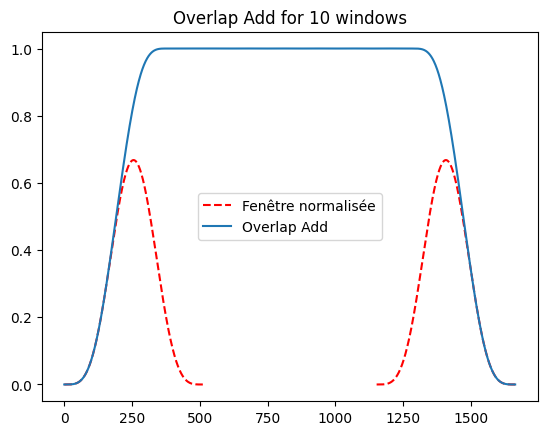

In [33]:
window = np.hanning(512)
hop_size = 128
norm = np.sum(window**2) / hop_size
ola(window*window/norm, hop_size)